In [1]:
import pandas as pd
import keras
import numpy as np
import performance_metrics

from sklearn.preprocessing import StandardScaler
from pickle import load

In [2]:
raw_data = pd.read_csv(r"../data/processed_data/oversampled_test.csv", index_col=0)


In [3]:
x = raw_data.drop(["TARGET"], axis=1)
y = raw_data.filter(["TARGET"], axis=1)

scaler = load(open(r"../models/scaler.pkl", "rb"))

x_scaled = scaler.transform(x)
# y = scaler.fit_transform(y)
# y = y.values  # we dont need to scale our binary classification

# x_scaled = x_scaled.reshape(x_scaled.shape[0], x_scaled.shape[1], )  # data needs to be 3D for a CNN

x_scaled.shape, y.shape


((84806, 120), (84806, 1))

In [4]:
# load trained model
model = keras.models.load_model(r"../models/neural_network/BayOpt_v1.03")


In [5]:
y_pred = model.predict(x_scaled)


2651/2651 [==============================] - 11s 4ms/step


In [6]:
# convert continuous data to binary
y_pred_binary = np.where(y_pred >= 0.5, 1, 0)

# createa a dataframe to house the predictions and true
y_results = pd.DataFrame()
y_results["y_true"] = y
y_results["y_pred"] = y_pred_binary

y_results.head(15).T

,111441,493644,269625,423712,80410,324062,11327,168580,117111,391348,515426,219714,150001,555146,275474
y_true,0,1,0,1,0,1,1,0,0,1,1,0,0,1,0
y_pred,0,1,0,1,0,1,0,0,0,1,1,0,0,1,0


In [7]:
metrics = performance_metrics.metrics(y_results["y_true"], y_results["y_pred"])

In [8]:
metrics.calculate_metrics()

           Score
Accuracy   0.921
Precision  0.984
Recall     0.855
F1-score   0.915
AUC-score  0.921


False positive rate: 1.35%


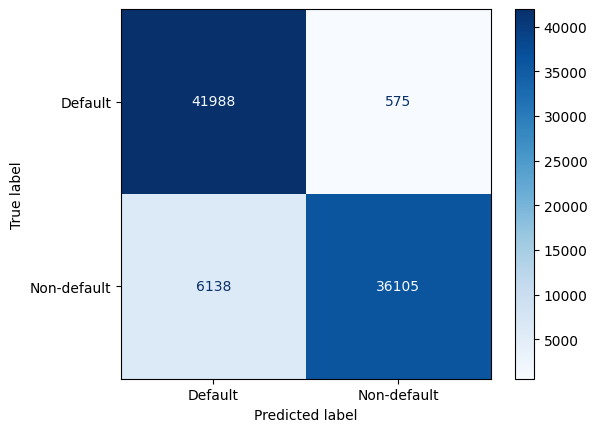

In [9]:
metrics.plot_confusion_matrix()

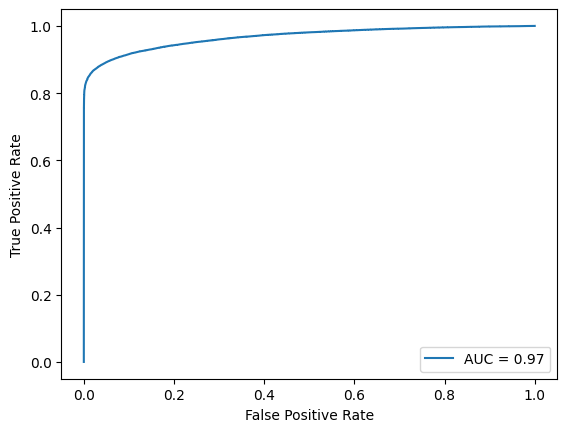

In [10]:
metrics.plot_roc(y_pred) # this y_pred is before the predictions are made binary, it is continuous data